In [138]:
import pandas as pd
import numpy as np

* **FASE DE CARGA**

In [139]:
house_train = pd.read_csv('Housing Dreams/house_train_raw.csv')
house_test = pd.read_csv('Housing Dreams/houses_test_raw.csv')

* **FASE DE ANALISIS**

In [140]:
null_columns = house_train.columns[house_train.isna().any()].tolist()
null_columns_type = {null_columns[i] : [house_train[null_columns[i]].isnull().sum(), str(house_train[null_columns[i]].dtype)] for i in range(len(null_columns))}
null_columns_type

{'LotFrontage': [259, 'float64'],
 'Alley': [1369, 'object'],
 'MasVnrType': [8, 'object'],
 'MasVnrArea': [8, 'float64'],
 'BsmtQual': [37, 'object'],
 'BsmtCond': [37, 'object'],
 'BsmtExposure': [38, 'object'],
 'BsmtFinType1': [37, 'object'],
 'BsmtFinType2': [38, 'object'],
 'Electrical': [1, 'object'],
 'FireplaceQu': [690, 'object'],
 'GarageType': [81, 'object'],
 'GarageYrBlt': [81, 'float64'],
 'GarageFinish': [81, 'object'],
 'GarageQual': [81, 'object'],
 'GarageCond': [81, 'object'],
 'PoolQC': [1453, 'object'],
 'Fence': [1179, 'object'],
 'MiscFeature': [1406, 'object']}

In [141]:
null_columns_test = house_test.columns[house_test.isna().any()].tolist()
null_columns_type_test = {null_columns_test[i] : [house_test[null_columns_test[i]].isnull().sum(), str(house_test[null_columns_test[i]].dtype)] for i in range(len(null_columns_test))}
null_columns_type_test

{'MSZoning': [4, 'object'],
 'LotFrontage': [227, 'float64'],
 'Alley': [1352, 'object'],
 'Utilities': [2, 'object'],
 'Exterior1st': [1, 'object'],
 'Exterior2nd': [1, 'object'],
 'MasVnrType': [16, 'object'],
 'MasVnrArea': [15, 'float64'],
 'BsmtQual': [44, 'object'],
 'BsmtCond': [45, 'object'],
 'BsmtExposure': [44, 'object'],
 'BsmtFinType1': [42, 'object'],
 'BsmtFinSF1': [1, 'float64'],
 'BsmtFinType2': [42, 'object'],
 'BsmtFinSF2': [1, 'float64'],
 'BsmtUnfSF': [1, 'float64'],
 'TotalBsmtSF': [1, 'float64'],
 'BsmtFullBath': [2, 'float64'],
 'BsmtHalfBath': [2, 'float64'],
 'KitchenQual': [1, 'object'],
 'Functional': [2, 'object'],
 'FireplaceQu': [730, 'object'],
 'GarageType': [76, 'object'],
 'GarageYrBlt': [78, 'float64'],
 'GarageFinish': [78, 'object'],
 'GarageCars': [1, 'float64'],
 'GarageArea': [1, 'float64'],
 'GarageQual': [78, 'object'],
 'GarageCond': [78, 'object'],
 'PoolQC': [1456, 'object'],
 'Fence': [1169, 'object'],
 'MiscFeature': [1408, 'object'],
 'S

* **Primer diccionario:** Columnas con valores nulos y su cantidad, para *house_train*
* **Segundo diccionario:** Columnas con valores nulos y su cantidad, para *house_test*

* **FASE DE TRANSFORMACIÓN, PREVIA AL MODELO**

In [142]:
house_train.LotFrontage = house_train.LotFrontage.fillna(house_train.LotFrontage.mean())
house_train.MasVnrType = house_train.MasVnrType.fillna(house_train.MasVnrType.mode()[0])
house_train.MasVnrArea = house_train.MasVnrArea.fillna(house_train.MasVnrArea.mean())
house_train.BsmtQual = house_train.BsmtQual.fillna(house_train.BsmtQual.mode()[0])
house_train.BsmtCond = house_train.BsmtCond.fillna(house_train.BsmtCond.mode()[0])
house_train.BsmtExposure = house_train.BsmtExposure.fillna(house_train.BsmtExposure.mode()[0])
house_train.BsmtFinType1 = house_train.BsmtFinType1.fillna(house_train.BsmtFinType1.mode()[0])
house_train.BsmtFinType2 = house_train.BsmtFinType2.fillna(house_train.BsmtFinType2.mode()[0])
house_train.Electrical = house_train.Electrical.fillna(house_train.Electrical.mode()[0])
house_train.FireplaceQu = house_train.FireplaceQu.fillna(house_train.FireplaceQu.mode()[0])
house_train.GarageType = house_train.GarageType.fillna(house_train.GarageType.mode()[0])
house_train.GarageYrBlt = house_train.GarageYrBlt.fillna(house_train.GarageYrBlt.mean())
house_train.GarageFinish = house_train.GarageFinish.fillna(house_train.GarageFinish.mode()[0])
house_train.GarageQual = house_train.GarageQual.fillna(house_train.GarageQual.mode()[0])
house_train.GarageCond = house_train.GarageCond.fillna(house_train.GarageCond.mode()[0])

* Para *house_train*: Si la variable es categorica, los nulos se remplazan con el valor **mas repetido**.
                        Si es numerica, los nulos se remplazan con la **media**.

In [143]:
house_test.LotFrontage = house_test.LotFrontage.fillna(house_test.LotFrontage.mean())
house_test.MasVnrType = house_test.MasVnrType.fillna(house_test.MasVnrType.mode()[0])
house_test.MasVnrArea = house_test.MasVnrArea.fillna(house_test.MasVnrArea.mean())
house_test.BsmtQual = house_test.BsmtQual.fillna(house_test.BsmtQual.mode()[0])
house_test.BsmtCond = house_test.BsmtCond.fillna(house_test.BsmtCond.mode()[0])
house_test.BsmtExposure = house_test.BsmtExposure.fillna(house_test.BsmtExposure.mode()[0])
house_test.BsmtFinType1 = house_test.BsmtFinType1.fillna(house_test.BsmtFinType1.mode()[0])
house_test.BsmtFinType2 = house_test.BsmtFinType2.fillna(house_test.BsmtFinType2.mode()[0])
house_test.Electrical = house_test.Electrical.fillna(house_test.Electrical.mode()[0])
house_test.FireplaceQu = house_test.FireplaceQu.fillna(house_test.FireplaceQu.mode()[0])
house_test.GarageType = house_test.GarageType.fillna(house_test.GarageType.mode()[0])
house_test.GarageYrBlt = house_test.GarageYrBlt.fillna(house_test.GarageYrBlt.mean())
house_test.GarageFinish = house_test.GarageFinish.fillna(house_test.GarageFinish.mode()[0])
house_test.GarageQual = house_test.GarageQual.fillna(house_test.GarageQual.mode()[0])
house_test.GarageCond = house_test.GarageCond.fillna(house_test.GarageCond.mode()[0])

house_test.MSZoning = house_test.MSZoning.fillna(house_test.MSZoning.mode()[0])
house_test.Utilities = house_test.Utilities.fillna(house_test.Utilities.mode()[0])
house_test.Exterior1st = house_test.Exterior1st.fillna(house_test.Exterior1st.mode()[0])
house_test.Exterior2nd = house_test.Exterior2nd.fillna(house_test.Exterior2nd.mode()[0])
house_test.BsmtFinSF1 = house_test.BsmtFinSF1.fillna(house_test.BsmtFinSF1.mean())
house_test.BsmtFinSF2 = house_test.BsmtFinSF2.fillna(house_test.BsmtFinSF2.mean())
house_test.BsmtUnfSF = house_test.BsmtUnfSF.fillna(house_test.BsmtUnfSF.mean())
house_test.TotalBsmtSF = house_test.TotalBsmtSF.fillna(house_test.TotalBsmtSF.mean())
house_test.BsmtFullBath = house_test.BsmtFullBath.fillna(house_test.BsmtFullBath.mean())
house_test.BsmtHalfBath = house_test.BsmtHalfBath.fillna(house_test.BsmtHalfBath.mean())
house_test.KitchenQual = house_test.KitchenQual.fillna(house_test.KitchenQual.mode()[0])
house_test.Functional = house_test.Functional.fillna(house_test.Functional.mode()[0])
house_test.GarageCars = house_test.GarageCars.fillna(house_test.GarageCars.mean())
house_test.GarageArea = house_test.GarageArea.fillna(house_test.GarageArea.mean())
house_test.SaleType = house_test.SaleType.fillna(house_test.SaleType.mode()[0])

* Para *house_test*: Si la variable es categorica, los nulos se remplazan con el valor **mas repetido**.
                        Si es numerica, los nulos se remplazan con la **media**.

In [144]:
house_train.drop(['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
house_test.drop(['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

Justificación de dropeo:
- **Id:** No podria interactuar con el modelo
- **Alley:** La suma de sus valores nulos supera el 50%
- **PoolQC:** La suma de sus valores nulos supera el 50%
- **Fence:** La suma de sus valores nulos supera el 50%
- **MiscFeature:** La suma de sus valores nulos supera el 50%

In [145]:
null_columns = house_train.columns[house_train.isna().any()].tolist()
null_columns_type = {null_columns[i] : [house_train[null_columns[i]].isnull().sum(), str(house_train[null_columns[i]].dtype)] for i in range(len(null_columns))}
null_columns_type

{}

In [146]:
null_columns_test = house_test.columns[house_test.isna().any()].tolist()
null_columns_type_test = {null_columns_test[i] : [house_test[null_columns_test[i]].isnull().sum(), str(house_test[null_columns_test[i]].dtype)] for i in range(len(null_columns_test))}
null_columns_type_test

{}

* **Verificación** de valores nulos, para ambos DataSets

In [110]:
house_train.shape

(1460, 76)

In [111]:
house_test.shape

(1459, 75)

In [147]:
object_columns = list(dict(house_train.select_dtypes(include=['object']).dtypes).keys())

* Esta lista contiene el nombre de todas las columnas de tipo Object (*Categoricas*) 

In [148]:
final_df= pd.concat([house_train, house_test], axis=0)

Justificación de concatenación:
* Se previene el hecho de que en las variables categoricas de testeo, **existan más categorias** que en las de entrenamiento  

In [149]:
def category_onehot_multcolumns(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        print(fields)
        df1=pd.get_dummies(final_df[fields], drop_first=True)

        final_df.drop([fields], axis=1, inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            df_final=pd.concat([df_final, df1], axis=1)
        i+=1
    df_final=pd.concat([final_df, df_final], axis=1)
    return df_final

* Esta funcion, interactua con la lista de variables categoricas (de ambos DataSets) y **genera las correspondientes dummies** 

In [114]:
final_df.shape

(2919, 76)

* Estado actual de concatenación

In [150]:
final_df=category_onehot_multcolumns(object_columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [116]:
final_df.shape

(2919, 237)

* Estado posterior a obtener las dummies

In [151]:
final_df=final_df.loc[:, ~final_df.columns.duplicated()]

* Se excluyen las columnas duplicadas

In [118]:
final_df.shape

(2919, 177)

* Estado posterior a depuración de duplicados

In [119]:
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [152]:
df_train=final_df.iloc[:1460, :]
df_test=final_df.iloc[1460:, :]

* Se divide la concatenación para devolver los DataSets de entrenamiento y testeo a su **forma** original

In [153]:
df_test.drop(['SalePrice'], axis=1, inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7124\3029927858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['SalePrice'], axis=1, inplace=True)


* Eliminamos la variable dependiente del DataSet de testeo, porque inicialmente no lo tenia

In [30]:
df_train.to_parquet('df_train.parquet')
df_test.to_parquet('df_test.parquet')

* Exportamos nuestros DataSets normalizados y sus dummies

In [31]:
df_train = pd.read_parquet('df_train.parquet', 'pyarrow')
df_test = pd.read_parquet('df_test.parquet', 'pyarrow')

* Ahora podemos trabajar desde estas importaciones

In [122]:
df_test.shape

(1459, 176)

* **FASE DE PUESTA EN MARCHA DEL MODELO**

In [154]:
X_train = df_train.drop(['SalePrice'], axis=1)
y_train = df_train['SalePrice']

* Tomamos todas las variables independientes de las que disponemos como **X_train**
* Establecemos el precio como variable dependiente o **y_train**

In [155]:
from sklearn.metrics import mean_squared_error, explained_variance_score
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
def plot_prediction_analisys(y, y_pred, figsize=(10,4), title=''):
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    axs[0].scatter(y, y_pred)
    mn = min(np.min(y), np.min(y_pred))
    mx = max(np.max(y), np.max(y_pred))
    axs[0].plot([mn, mx], [mn, mx], c='red')
    axs[0].set_xlabel('$y$')
    axs[0].set_ylabel('$\hat{y}$')
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    evs = explained_variance_score(y, y_pred)
    axs[0].set_title('rmse = {:.2f}, evs= {:.2f}'.format(rmse, evs))

    axs[1].hist(y-y_pred, bins=50)
    avg = np.mean(y-y_pred)
    std = np.std(y-y_pred)
    axs[1].set_xlabel('$y - \hat{y}$')
    axs[1].set_title('Histogram prediction error, $\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(avg, std))

    fig.suptitle(title, fontweight ="bold", size=16, y=1.12)

* Esta función, dibuja por nosotros el esquema de dispersión de nuestra regresión y un histograma de errores, además, nos regresa los indicadores que necesitamos para evaluar el estado actual del modelo y su capacidad predictiva.   

In [157]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [124]:

from sklearn.model_selection import RandomizedSearchCV as RSCV

param_grid = {'n_estimators':np.arange(50,200,15),
              'max_features':np.arange(0.1, 1, 0.1),
              'max_depth': [5, 7, 9, 11, 13, 15],
              'max_samples': [0.3, 0.5, 0.8]}

model = RSCV(RandomForestRegressor(), param_grid, n_iter = 15).fit(X_train, y_train)
model = model.best_estimator_
model 

RandomForestRegressor(max_depth=13, max_features=0.2, max_samples=0.8,
                      n_estimators=140)

* Con este proceso se busca **determinar parametros optimos** para nuestra regresión apriori 

In [135]:
model_lin = Pipeline((
    ('satandard_scaler', StandardScaler()),
    ('lin_reg', RandomForestRegressor(max_depth=15, random_state=0, n_estimators=500)),
))

model_lin.fit(X_train, y_train)

Pipeline(steps=[('satandard_scaler', StandardScaler()),
                ('lin_reg',
                 RandomForestRegressor(max_depth=15, n_estimators=500,
                                       random_state=0))])

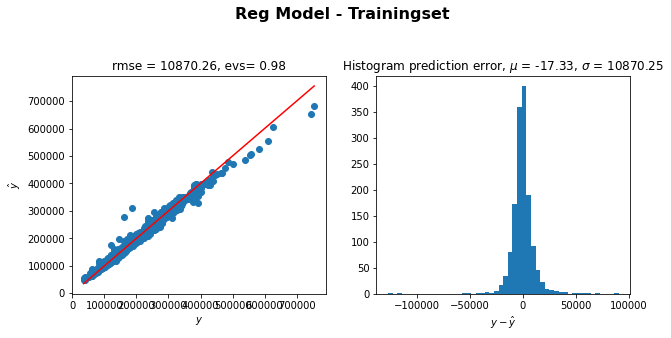

In [136]:
y_train_pred = model_lin.predict(X_train)

plot_prediction_analisys(y_train, y_train_pred, title='Reg Model - Trainingset')

Justificación de estandarizacion:
- La estandarización de un conjunto de datos es un requisito común para muchos estimadores de aprendizaje automático: es posible que se comporten mal si las características individuales no se parecen más o menos a datos estándar distribuidos normalmente (p. ej., gaussianos con media 0 y varianza unitaria).

Justificación de modelo:
* Utilizamos RandomForestRegressor por las caracteristicas de nuestra variable dependiente, está es de tipo numerico (Responde a un precio), por tanto descartamos un modelo clasificatorio y se usa RandomForest por su capacidad.

In [159]:
import pickle

with open('houses_model.pkl', 'wb') as pdis:
    pickle.dump(model_lin, pdis)

* **Exportamos nuestro modelo**

In [158]:
model_lin = pd.read_pickle('houses_model.pkl')

In [159]:
rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print('Nuestro error cuadratico medio y desviación estandar es: {:.2f}'.format(rmse))

Nuestro error cuadratico medio y desviación estandar es: 10870.26


In [160]:
from sklearn.metrics import mean_squared_log_error

rmsle = round(mean_squared_log_error(y_train, y_train_pred, squared=False), 2)
print('Nuestro error cuadratico medio logaritmico es {:.2f}'.format(rmsle))

Nuestro error cuadratico medio logaritmico es 0.06


* **FASE DE GENERACIÓN DE PRECIOS PARA LOS DATOS DE PRUEBA**

In [41]:
df_test['SalePrice'] = model_lin.predict(df_test)

In [42]:
df_test['SalePrice'] = round(df_test['SalePrice'], 2)

* Usamos el modelo para generar los valores de precio en *house_test*

In [43]:
df_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial,SalePrice
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,1,0,126901.33
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,1,0,155657.69
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,1,0,179576.61
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,1,0,182688.43
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,1,0,0,0,1,0,198609.68


* **FASE FINAL CSV PARA HACER SUBMIT**

In [65]:
submit_df = pd.read_csv('Housing Dreams/houses_test_raw.csv')

In [66]:
submit_df['SalePrice'] = df_test['SalePrice']

In [67]:
submit_df = submit_df[['Id', 'SalePrice']]

In [68]:
submit_df.set_index('Id')

,SalePrice
Id,
1461,126901.33
1462,155657.69
1463,179576.61
1464,182688.43
1465,198609.68
...,...
2915,84325.14
2916,87334.05
2917,153910.93


* Este nuevo DataSet, cuyo proposito es testear resultados, solo contiene el ID de la venta y su determinado precio (Producto de la predicción del modelo)

In [134]:
submit_df.to_csv('sample_submission.csv', index=False)

* Con **'sample_submission.csv'**, se podra testear compárativamente los resultados

In [167]:
X_train.shape

(1460, 176)

In [168]:
y_train.shape

(1460,)

In [161]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [173]:
import keras.backend as K

def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [208]:
classifier = Sequential()

classifier.add(Dense(50, kernel_initializer= 'he_uniform', activation= 'relu', input_dim= 176))
classifier.add(Dense(25, kernel_initializer= 'he_uniform', activation= 'relu'))
classifier.add(Dense(50, kernel_initializer= 'he_uniform', activation= 'relu'))
classifier.add(Dense(1, kernel_initializer= 'he_uniform'))

classifier.compile(loss='mse', optimizer= 'adam')

model_history = classifier.fit(X_train, y_train, validation_split=0.20, batch_size=10, epochs=1000) # epoch=1000 , 

Epoch 1/1000
117/117 [==============================] - 2s 8ms/step - loss: 25408210944.0000 - val_loss: 5847259136.0000
Epoch 2/1000
117/117 [==============================] - 1s 6ms/step - loss: 6027282944.0000 - val_loss: 5046044672.0000
Epoch 3/1000
117/117 [==============================] - 1s 5ms/step - loss: 4217945344.0000 - val_loss: 4215028992.0000
Epoch 4/1000
117/117 [==============================] - 1s 5ms/step - loss: 3344432128.0000 - val_loss: 3852643328.0000
Epoch 5/1000
117/117 [==============================] - 1s 5ms/step - loss: 2837686016.0000 - val_loss: 3605779456.0000
Epoch 6/1000
117/117 [==============================] - 1s 5ms/step - loss: 2510976512.0000 - val_loss: 3410697472.0000
Epoch 7/1000
117/117 [==============================] - 1s 5ms/step - loss: 2183150080.0000 - val_loss: 3259324160.0000
Epoch 8/1000
117/117 [==============================] - 1s 6ms/step - loss: 1912489984.0000 - val_loss: 3251845632.0000
Epoch 9/1000
117/117 [=================

In [211]:
ann_pred = classifier.predict(X_train)

46/46 [==============================] - 0s 4ms/step
